In [1]:
from math import trunc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def drop_outliers(df):
    col_interest = 'Victims Injured'
    q1 = df[col_interest].quantile(0.25)
    q3 = df[col_interest].quantile(0.75)
    iqr = q3 - q1
    outliers_removed = df[(df[col_interest] >= (q1 - 1.5 * iqr)) & (df[col_interest] <= (q3 + 1.5 * iqr))]
def proccess_data():
    data_path = 'Data/MergedGunData.csv'
    df = pd.read_csv(data_path)
    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df = df.dropna(subset=['Address'])
    #handle data parsing
    df['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df.sort_values(by='dates_proccessed')
    #Optional: write back proccessed data
    df.to_csv('Data/ProcessedGunData.csv',index=False)

proccess_data()

Incident ID             0
Incident Date           0
State                   0
City Or County          0
Address                13
Victims Killed          0
Victims Injured         0
Suspects Killed         0
Suspects Injured        0
Suspects Arrested       0
Operations           3018
Year                    0
dtype: int64


In [5]:
'''
Summary of Total Killed and Injured 
'''

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)
print(df.columns)


Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Year',
       'dates_proccessed'],
      dtype='object')


In [7]:
import pandas as pd
import plotly.express as px

# Load the data
file_path = 'ProcessedGunData.csv'
df = pd.read_csv(file_path)

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Convert full state names to abbreviations
df['State'] = df['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df.groupby('State').agg({'Victims Killed': 'sum', 'Victims Injured': 'sum'}).reset_index()

In [9]:
abbrev_to_state = {v: k for k, v in state_abbr.items()}

In [11]:
def add_surrendered_captured_data(df,new_data_path):
    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
    # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_arrested = dict(zip(df_new['Incident ID'], df_new['Suspects Arrested']))
    
    # Create the new 'Suspect Surrendered' column
    df['Suspect Surrendered'] = df['Incident ID'].map(id_to_arrested).fillna(0).astype(int)

    df['Suspect Captured'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Arrested']>0 and df.loc[index,'Suspect Surrendered'] == 0):
            df.loc[index,'Suspect Captured'] = df.loc[index,'Suspects Arrested']
    
    return df
    



In [13]:
def add_suicide_kills_data(df,new_data_path):
    df_new = pd.read_csv(new_data_path)
    # Check for missing values
    missing_values = df_new.isnull().sum()
    print(missing_values)
    # drop the cases with no address but no operations is fine since only 13 cases
    df_new = df_new.dropna(subset=['Address'])
    #handle data parsing
    df_new['dates_proccessed'] = pd.to_datetime(df['Incident Date'], format='%B %d, %Y')
    df_new.sort_values(by='dates_proccessed')
    
        # Create a dictionary mapping 'Incident ID' to 'Suspect Arrested'
    id_to_killed = dict(zip(df_new['Incident ID'], df_new['Suspects Killed']))
    
    df['Suspects Suicide'] = df['Incident ID'].map(id_to_killed).fillna(0).astype(int)

    df['Suspects Killed by Cop'] = 0

    for index, row in df.iterrows():
        if(df.loc[index,'Suspects Killed']>0 and df.loc[index,'Suspects Suicide'] == 0):
            df.loc[index,'Suspects Killed by Cop'] = df.loc[index,'Suspects Killed']
            #print(df.loc[index,'Suspects Killed'])
    
    return df



In [15]:
df_added = add_surrendered_captured_data(df,'Data/mass_shooting_13_24_surrenders.csv')
df_added = add_suicide_kills_data(df_added,'Data/mass_shooting_13_24_suicides.csv')

df_added

Incident ID           0
Incident Date         0
State                 0
City Or County        0
Address               0
Victims Killed        0
Victims Injured       0
Suspects Killed       0
Suspects Injured      0
Suspects Arrested     0
Operations           20
dtype: int64
Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                0
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           186
dtype: int64


Incident ID      Incident Date State City Or County  \
0         1582816  December 29, 2019    IL       Danville   
1         1582197  December 29, 2019    NY        Buffalo   
2         1583444  December 29, 2019    CA          Ceres   
3         1581590  December 27, 2019    CA        Modesto   
4         1581103  December 27, 2019    TX        Houston   
...           ...                ...   ...            ...   
3000      2492601    January 1, 2023    IL        Chicago   
3001      2492611    January 1, 2023    NC         Durham   
3002      2493102    January 1, 2023    PA      Allentown   
3003      2492448    January 1, 2023    FL          Ocala   
3004      2492314    January 1, 2023    OH       Columbus   

                         Address  Victims Killed  Victims Injured  \
0     1803 block of Westview Ave               0                5   
1      50 block of Henrietta Ave               1                3   
2      800 block of Allacante Dr               0                5   
3       1900 block of Vernon Ave               1                3   
4          500 block of Smart St               2                7   
...                          ...             ...              ...   
3000      300 block of E 57th St               1                3   
3001           1000 N Miami Blvd               0                5   
3002             1140 E Clair St               0                4   
3003     1600 block of SW 5th St               2                4   
3004           2830 Johnstown Rd               1                4   

      Suspects Killed  Suspects Injured  Suspects Arrested  Operations  Year  \
0                   0                 0                  0         NaN  2019   
1                   0                 0                  0         NaN  2019   
2                   0                 0                  0         NaN  2019   
3                   0                 0                  0         NaN  2019   
4                   0                 0                  4         NaN  2019   
...               ...               ...                ...         ...   ...   
3000                0                 0                  0         NaN  2023   
3001                0                 0                  0         NaN  2023   
3002                0                 0                  0         NaN  2023   
3003                0                 0                  1         NaN  2023   
3004                0                 0                  2         NaN  2023   

     dates_proccessed  Suspect Surrendered  Suspect Captured  \
0          2019-12-29                    0                 0   
1          2019-12-29                    0                 0   
2          2019-12-29                    0                 0   
3          2019-12-27                    0                 0   
4          2019-12-27                    0                 4   
...               ...                  ...               ...   
3000       2023-01-01                    0                 0   
3001       2023-01-01                    0                 0   
3002       2023-01-01                    0                 0   
3003       2023-01-01                    0                 1   
3004       2023-01-01                    0                 2   

      Suspects Suicide  Suspects Killed by Cop  
0                    0                       0  
1                    0                       0  
2                    0                       0  
3                    0                       0  
4                    0                       0  
...                ...                     ...  
3000                 0                       0  
3001                 0                       0  
3002                 0                       0  
3003                 0                       0  
3004                 0                       0  

[3005 rows x 17 columns]

In [17]:
df_added.to_csv('Data/added_suspect_data.csv')

In [ ]:
"""
police_action_index 

suspect capture - police action rewarded - justice index high
suspect kill - police action rewarded - justice index moderate - high
suspect suicide - police action penalized based on victim count
suspect surrender- police action penalized based on victim count
suspect injured only (rare)
suspect at large - police action heavily penalized based on victim count

"""

In [19]:
def incident_per_state(df):
    incident_by_state={}

    for index, row in df.iterrows():
        if(df.loc[index,'State'] in incident_by_state):
            incident_by_state[df.loc[index,'State']] += 1
        else:
            incident_by_state[df.loc[index,'State']] = 1

    return incident_by_state



def incident_per_city(df):
    incident_by_city={}

    for index, row in df.iterrows():
        if(df.loc[index,'City Or County'] in incident_by_city):
            incident_by_city[df.loc[index,'City Or County']] += 1
        else:
            incident_by_city[df.loc[index,'City Or County']] = 1

    return incident_by_city


In [23]:
df_added['State'] = df_added['State'].map(abbrev_to_state)

In [25]:
incident_by_state = incident_per_state(df_added)
incident_by_city = incident_per_city(df_added)

In [27]:
def add_police_action_index(df):

    df['Police Action Index'] = 0.0
    
    for index, row in df.iterrows():
        kills=df.loc[index,'Suspects Killed']
        arrests=df.loc[index,'Suspects Arrested']
        total_suspects = kills + arrests + df.loc[index,'Suspects Injured']
        escaped=(kills==0 and arrests == 0)
        
        kill_suicide=df.loc[index,'Suspects Suicide']
        kill_cop=df.loc[index,'Suspects Killed by Cop']
        arrests_surrender=df.loc[index,'Suspect Surrendered']
        arrests_capture=df.loc[index,'Suspect Captured']

        victim_kill = df.loc[index,'Victims Killed']
        victim_injured = df.loc[index,'Victims Injured']

        police_action=0

        if(escaped and (victim_kill+victim_injured == 0)):
            police_action = 0
        elif(escaped and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        
        if(total_suspects!=0):
            police_action += ((arrests_capture * 1.0) + (arrests_surrender * 0.8) + (kill_cop * 0.6) + (kill_suicide * 0.3))    
                  
        if(not(escaped) and (victim_kill+victim_injured > 0)):
            police_action -= (victim_kill*0.2 + victim_injured*0.05)
        

        
        police_action_index = police_action 
        df.loc[index,'Police Action Index'] = police_action_index
    
    return df

def normalize_police_action_index(df):
    total_pa = df['Police Action Index'].sum()

    df['Police Action Index Normalized'] = df['Police Action Index'] / total_pa

    return df

df_index_added = add_police_action_index(df_added)
df_index_added3 = normalize_police_action_index(df_index_added)

In [ ]:
"""
def normalize_police_action_index_state(df,incident_by_state):
    state_pa_dict = {}

    state_police = df.groupby('State')['Police Action Index Normalized'].sum()

    #normalized_values = state_police['State'].map(incident_by_state)
    
    return type(state_police)
    


def normalize_police_action_index_city(df,incident_by_city):
    city_pa_dict = {}

    city_police = df.groupby('City Or County')['Police Action Index'].agg(lambda x: (x**2).sum())

    normalized_values = city_police.div(incident_by_city)
    
    return normalized_values
"""

In [29]:
df_index_added3.to_csv('Data/added_police_5yr.csv')

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\1535243038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')


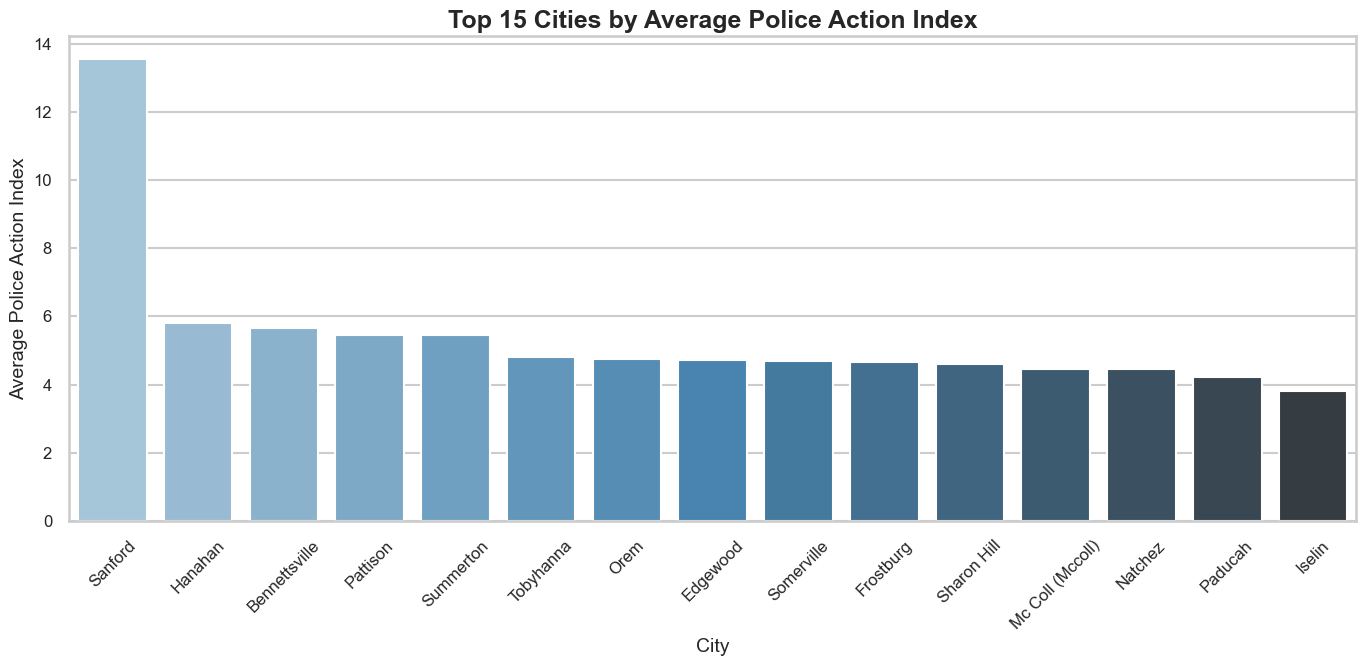

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\1535243038.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')


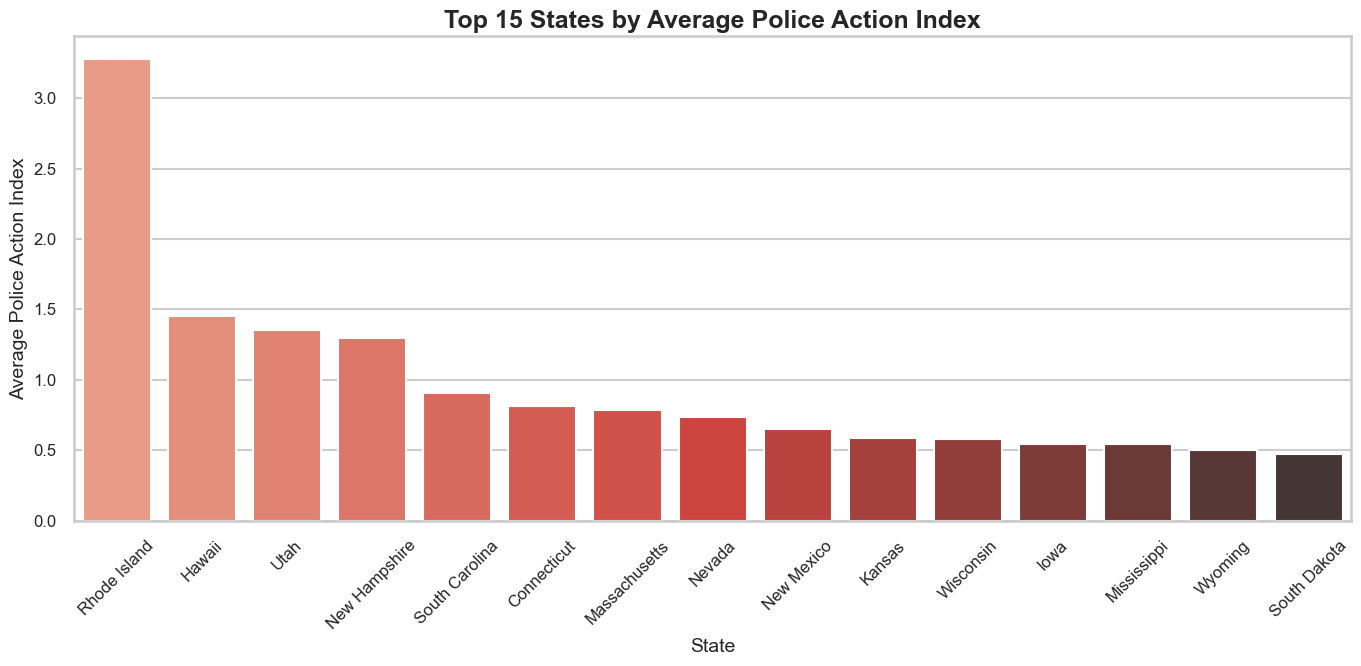

In [31]:
import matplotlib.pyplot as plt


# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_police = df_index_added.groupby('City Or County')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')
plt.title('Top 15 Cities by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Police Action Index
state_police = df_index_added.groupby('State')['Police Action Index'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Average Police Action Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\2855163159.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')


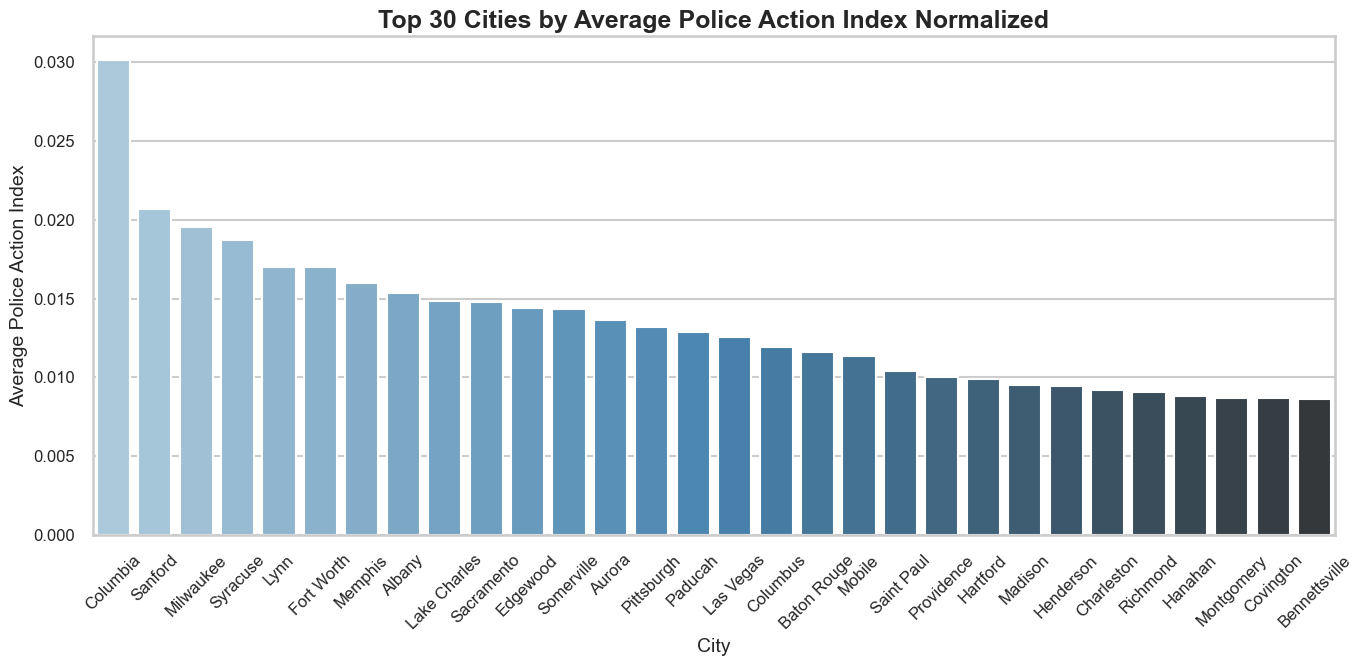

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\2855163159.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')


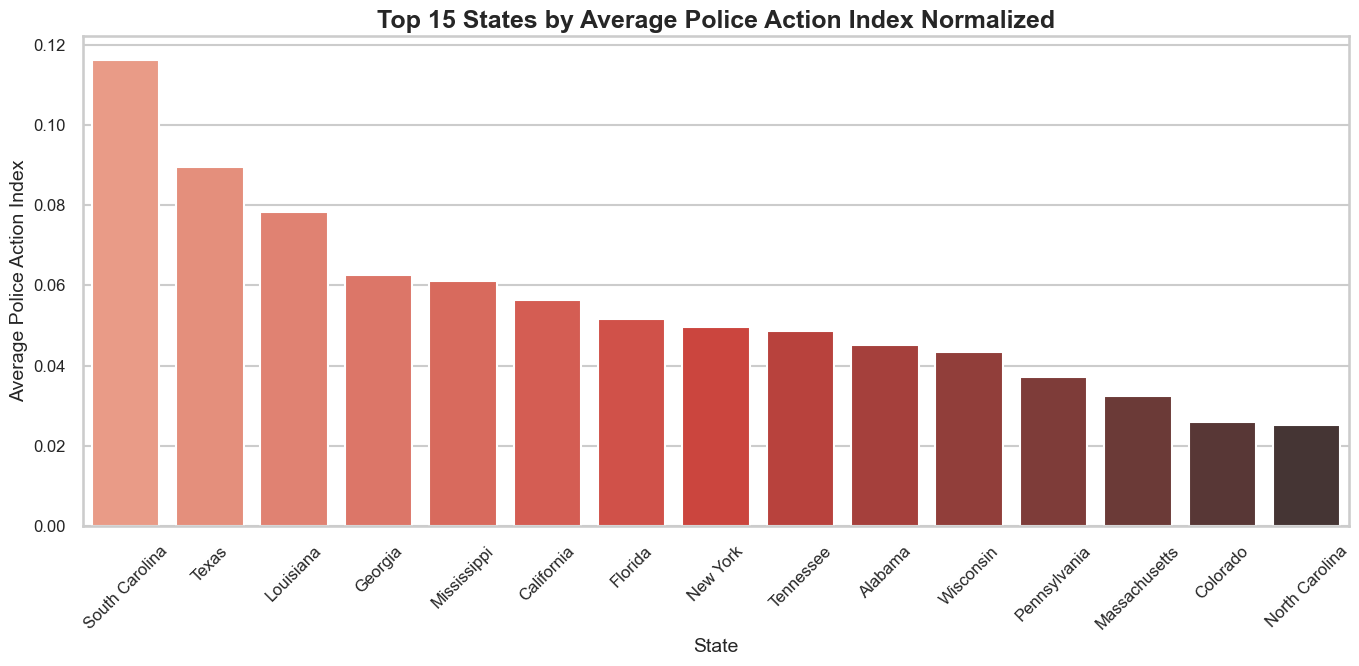

In [33]:
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid', context='talk')

# index with number of incidents

city_police = df_index_added3.groupby('City Or County')['Police Action Index Normalized'].sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_police.index, y=city_police.values, palette='Blues_d')
plt.title('Top 30 Cities by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Top 15 States by Normalized Police Action Index
state_police = df_index_added3.groupby('State')['Police Action Index Normalized'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=state_police.index, y=state_police.values, palette='Reds_d')
plt.title('Top 15 States by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\4253983500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_police_worst.index, y=state_police_worst.values, palette='Reds_d')


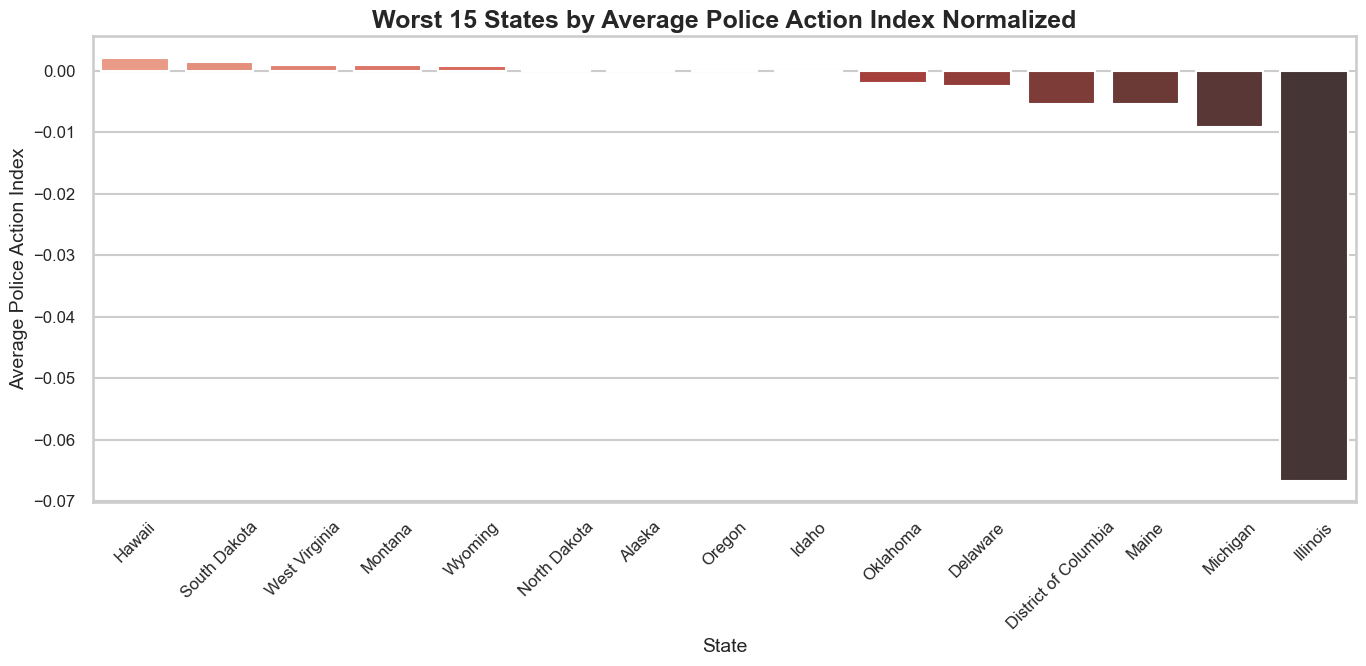

In [35]:
# Bottom 15 States by Police Action Index
state_police_worst = df_index_added3.groupby('State')['Police Action Index Normalized'].sum().sort_values(ascending=False).tail(15)


plt.figure(figsize=(14, 7))
sns.barplot(x=state_police_worst.index, y=state_police_worst.values, palette='Reds_d')
plt.title('Worst 15 States by Average Police Action Index Normalized', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\55167996.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')


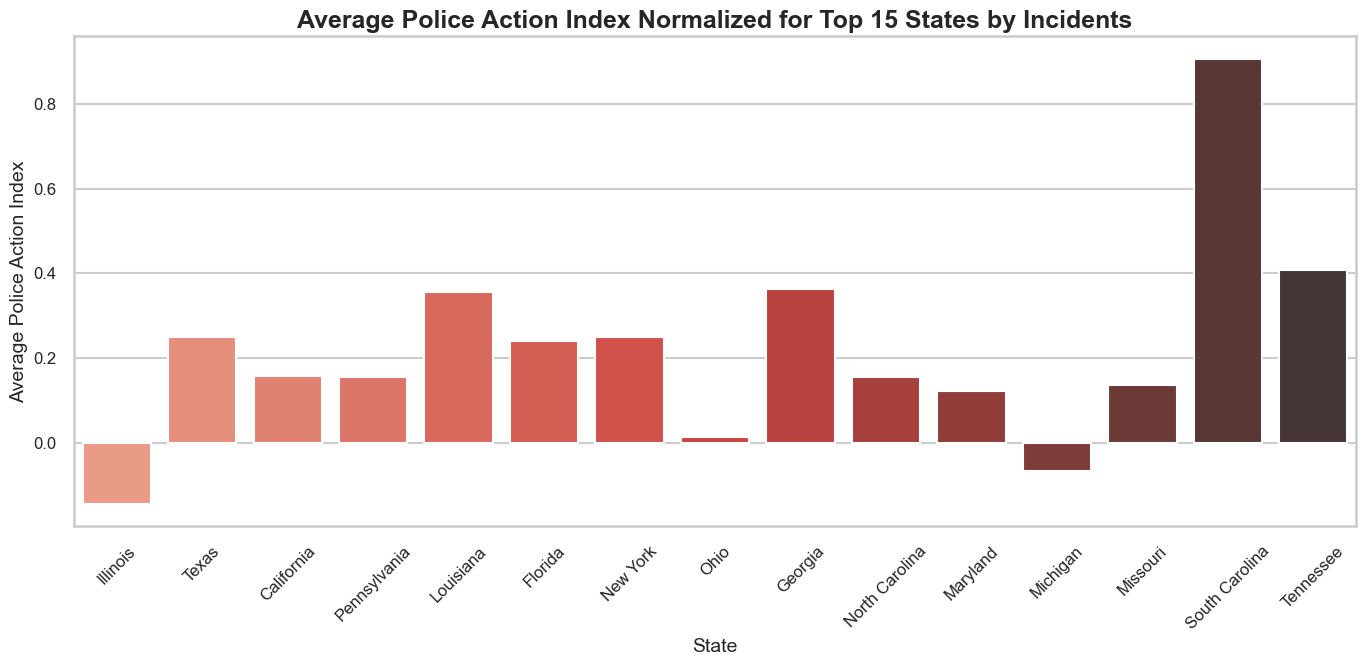

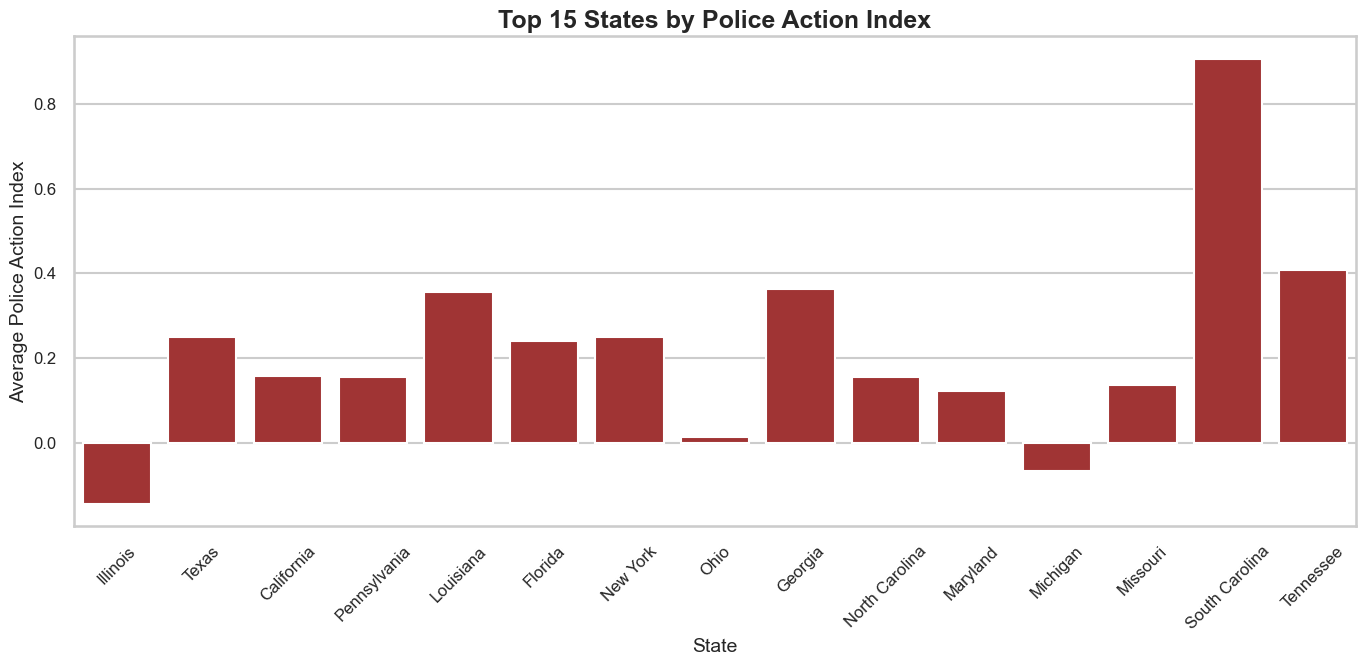

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\55167996.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


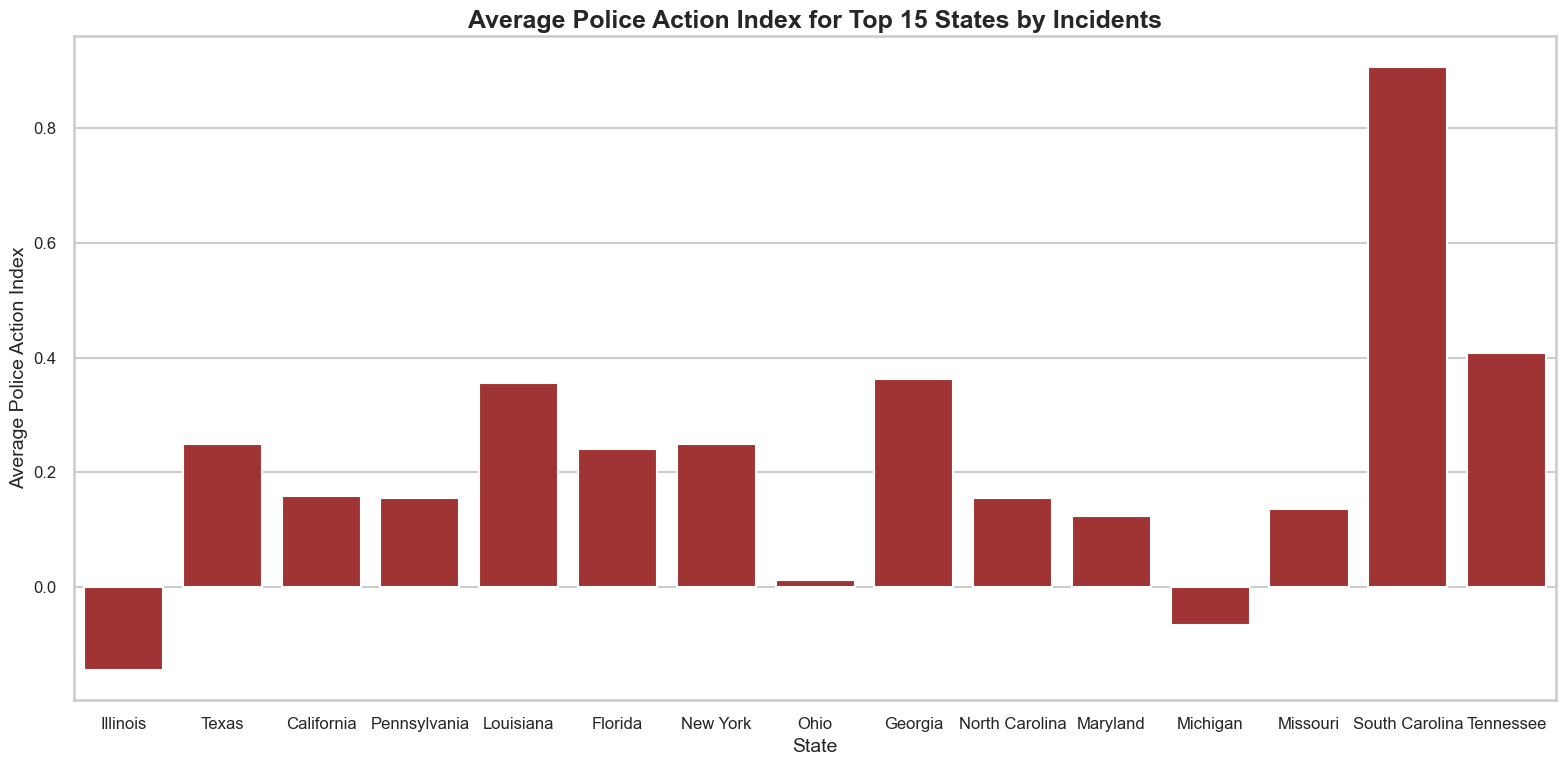

In [37]:
sorted_incident_state = dict(sorted(incident_by_state.items(), key=lambda item: item[1]))

police_action_by_state = df_index_added3.groupby('State')['Police Action Index'].mean()


sorted_states = sorted(sorted_incident_state.keys(), key=lambda x: sorted_incident_state[x], reverse=True)

top_15_states = sorted_states[:15]

top_15_police_action = police_action_by_state.loc[top_15_states]


plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')
plt.title('Average Police Action Index Normalized for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, color='firebrick')
plt.title('Top 15 States by Police Action Index', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, color='firebrick')
plt.title('Average Police Action Index for Top 15 States by Incidents', fontsize=18, weight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
# Adjust x-axis labels to prevent overlap
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
plt.tight_layout()
plt.show()



C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\642315162.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')


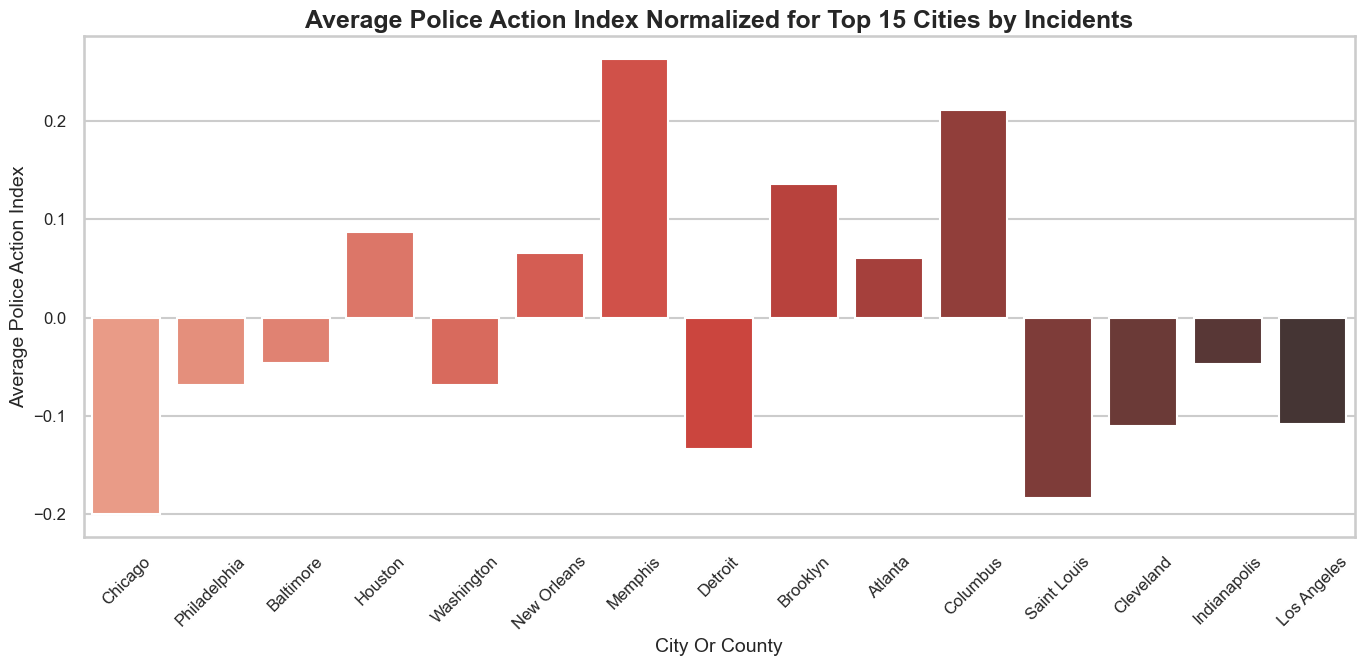

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\642315162.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha='center')


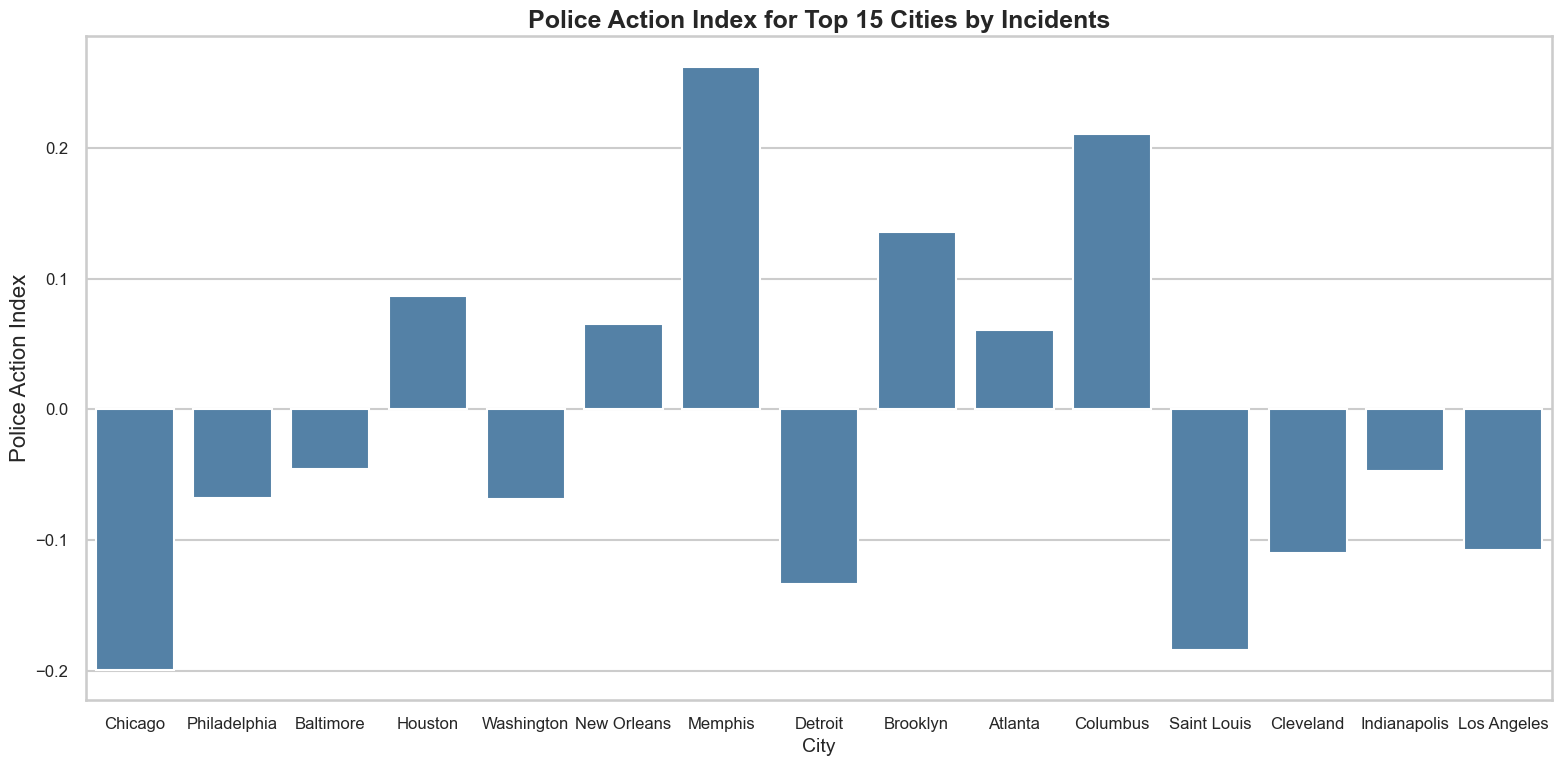

In [39]:
sorted_incident_city = dict(sorted(incident_by_city.items(), key=lambda item: item[1]))


police_action_by_city = df_index_added3.groupby('City Or County')['Police Action Index'].mean()


sorted_city = sorted(sorted_incident_city.keys(), key=lambda x: sorted_incident_city[x], reverse=True)

top_15_city = sorted_city[:15]

top_15_police_action = police_action_by_city.loc[top_15_city]

plt.figure(figsize=(14, 7))
sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, palette='Reds_d')
plt.title('Average Police Action Index Normalized for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City Or County', fontsize=14)
plt.ylabel('Average Police Action Index', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 8))
ax = sns.barplot(x=top_15_police_action.index, y=top_15_police_action.values, color='steelblue')
plt.title('Police Action Index for Top 15 Cities by Incidents', fontsize=18, weight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Police Action Index', fontsize=16)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.2)
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
plt.tight_layout()
plt.show()

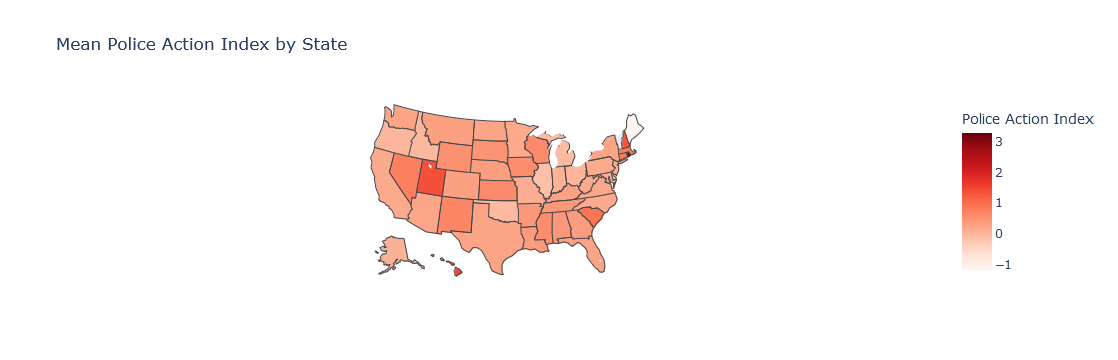

In [41]:
import pandas as pd
import plotly.express as px

# Convert full state names to abbreviations
df_map = df_index_added.copy()

# Dictionary to map full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

df_map['State'] = df_map['State'].map(state_abbr)

# Calculate total victims killed and injured for each state
total_victims = df_map.groupby('State').agg({'Police Action Index': 'mean'}).reset_index()

# Create choropleth map for victims killed
fig_killed = px.choropleth(
    total_victims,
    locations='State',
    locationmode='USA-states',
    color='Police Action Index',
    scope='usa',
    color_continuous_scale='Reds',
    labels={'Police Action Index': 'Police Action Index'},
    title='Mean Police Action Index by State'
)

# Show the maps
fig_killed.show()

In [43]:
# Resample the data to get monthly totals
# Convert 'Incident Date' to datetime format
df_map['Incident Date'] = pd.to_datetime(df_map['Incident Date'])

# Set the index to 'Incident Date'
df_map.set_index('Incident Date', inplace=True)

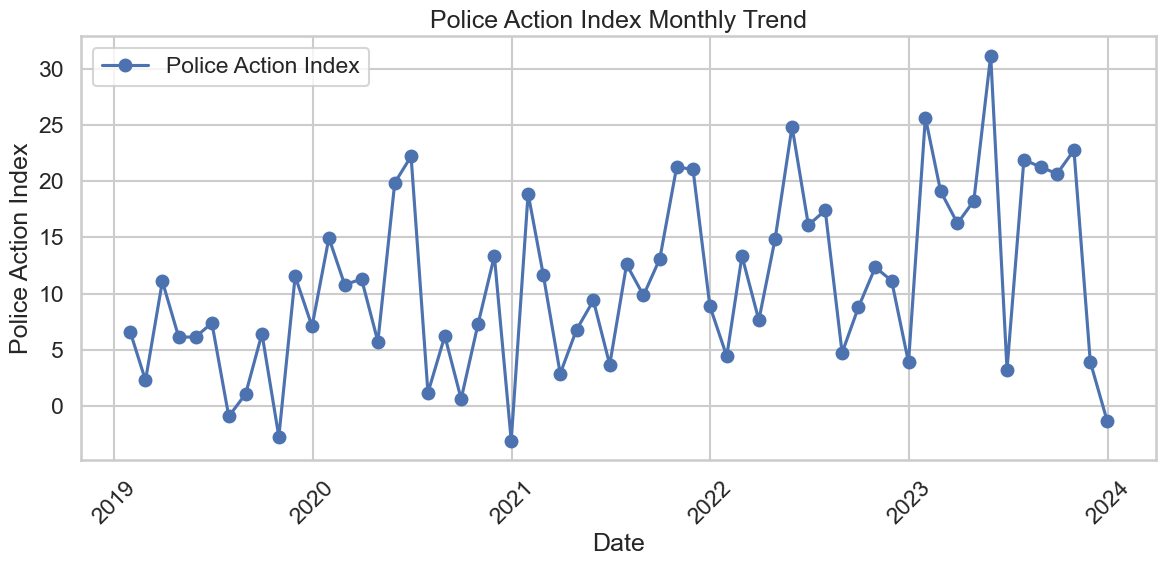

In [45]:
monthly_totals = df_map.resample('ME').agg({'Police Action Index': 'sum'})


# Plotting
plt.figure(figsize=(12, 6))
#plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.plot(monthly_totals.index, monthly_totals['Police Action Index'], label='Police Action Index', marker='o')
plt.title('Police Action Index Monthly Trend')
plt.xlabel('Date')
plt.ylabel('Police Action Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

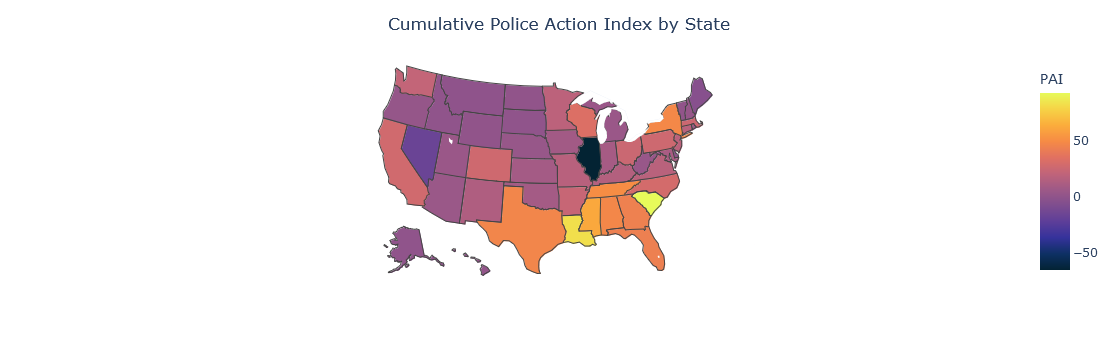

In [49]:
import pandas as pd
import plotly.express as px

# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Calculate average Police Action Index by state
average_pai = data.groupby('State')['Police Action Index'].sum().reset_index()

# Create a mapping of state names to their abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviations to the DataFrame
average_pai['Abbreviation'] = average_pai['State'].map(state_abbrev)

# Create the plot
fig = px.choropleth(
    average_pai,
    locations='Abbreviation',
    locationmode='USA-states',
    color='Police Action Index',
    color_continuous_scale=px.colors.sequential.thermal,
    labels={'Police Action Index': 'PAI'},
    scope='usa',
)

# Update layout
fig.update_layout(
    title={'text': 'Cumulative Police Action Index by State', 'x': 0.5},
    coloraxis_colorbar=dict(title='PAI', x=1.02),
    margin=dict(r=60)
)

# Show the figure
fig.show()

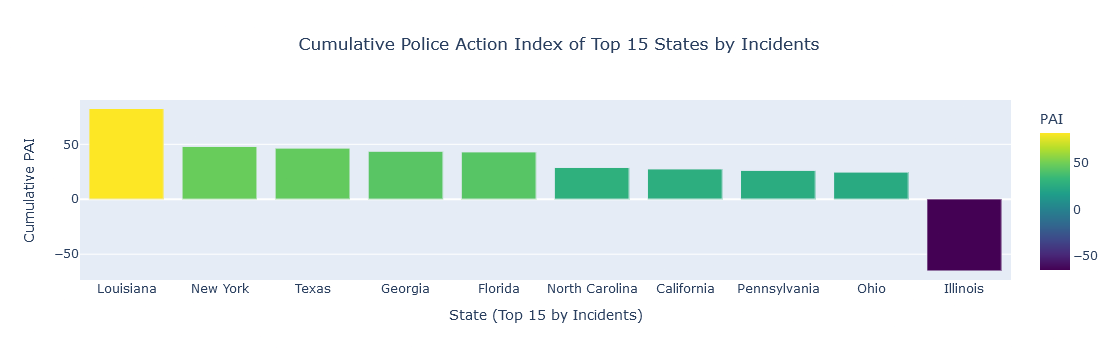

In [51]:
import pandas as pd
import plotly.express as px

# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Calculate cumulative Police Action Index by state
cumulative_pai = data.groupby('State')['Police Action Index'].sum().reset_index()

# Identify the top 15 states by the number of incidents
top_states = data['State'].value_counts().nlargest(10).index.tolist()

# Filter data for top 15 states
filtered_data = cumulative_pai[cumulative_pai['State'].isin(top_states)]

# Create the plot
fig = px.bar(
    filtered_data.sort_values(by='Police Action Index', ascending=False),
    x='State',
    y='Police Action Index',
    title='Cumulative Police Action Index of Top 15 States by Incidents',
    labels={'Police Action Index': 'Cumulative PAI'},
    color='Police Action Index',
    color_continuous_scale=px.colors.sequential.Viridis
)

# Update layout for aesthetics
fig.update_layout(
    title={'text': 'Cumulative Police Action Index of Top 15 States by Incidents', 'x': 0.5},
    xaxis_title='State (Top 15 by Incidents)',
    yaxis_title='Cumulative PAI',
    coloraxis_colorbar=dict(title='PAI', x=1.02),
    margin=dict(r=60)
)

# Show the figure
fig.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\1616801429.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\1616801429.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



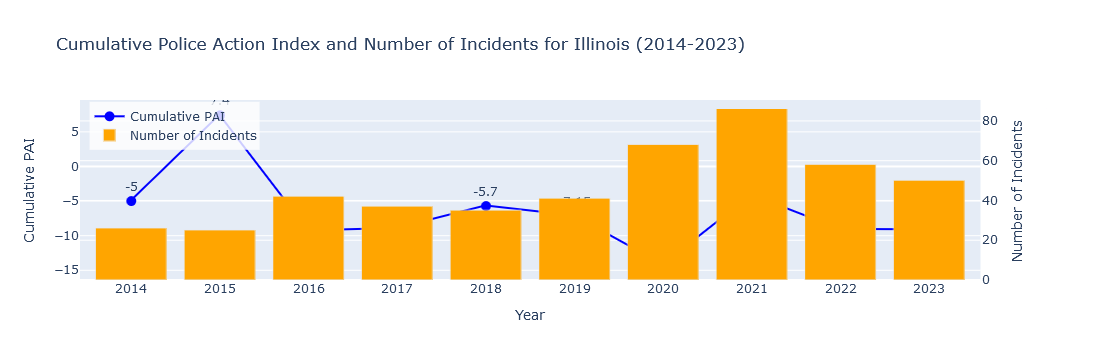

In [53]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Filter the data for Illinois
illinois_data = data[data['State'] == 'Illinois']

# Convert 'Incident Date' to datetime and extract the year
illinois_data['Incident Date'] = pd.to_datetime(illinois_data['Incident Date'])
illinois_data['Year'] = illinois_data['Incident Date'].dt.year

# Group by year and calculate cumulative metrics
annual_data = illinois_data.groupby('Year').agg({
    'Police Action Index': 'sum',
    'Incident ID': 'count'
}).rename(columns={'Incident ID': 'Number of Incidents'}).reset_index()

# Create subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add cumulative Police Action Index trace
fig.add_trace(
    go.Scatter(
        x=annual_data['Year'],
        y=annual_data['Police Action Index'],
        mode='lines+markers+text',
        name='Cumulative PAI',
        text=annual_data['Police Action Index'].round(2),
        textposition='top center',
        line=dict(color='blue'),
        marker=dict(size=10)
    ),
    secondary_y=False
)

# Add number of incidents trace
fig.add_trace(
    go.Bar(
        x=annual_data['Year'],
        y=annual_data['Number of Incidents'],
        name='Number of Incidents',
        marker=dict(color='orange')
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title='Cumulative Police Action Index and Number of Incidents for Illinois (2014-2023)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=2014,
        dtick=1
    ),
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.8)'),
    hovermode='x unified'
)

# Update y-axes
fig.update_yaxes(title_text="Cumulative PAI", secondary_y=False)
fig.update_yaxes(title_text="Number of Incidents", secondary_y=True)

# Show the figure
fig.show()

C:\Users\hari2\AppData\Local\Temp\ipykernel_56272\1829610243.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



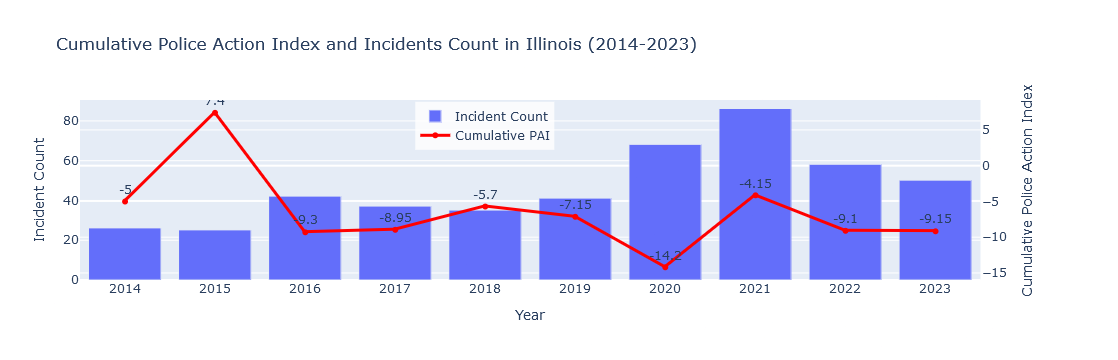

In [55]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the CSV file
data = pd.read_csv('Data/added_police_and_justice_10.csv')

# Convert 'Incident Date' to datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter data for Illinois
illinois_data = data[data['State'] == 'Illinois']

# Extract year from Incident Date
illinois_data['Year'] = illinois_data['Incident Date'].dt.year

# Calculate cumulative Police Action Index and incidents per year
cumulative_pai = illinois_data.groupby('Year')['Police Action Index'].sum().reset_index()
incident_counts = illinois_data.groupby('Year').size().reset_index(name='Incident Count')

# Merge the two DataFrames on year
plot_data = pd.merge(cumulative_pai, incident_counts, on='Year')

# Create a figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar chart for incident counts
fig.add_trace(
    go.Bar(x=plot_data['Year'], y=plot_data['Incident Count'], name='Incident Count'),
    secondary_y=False,
)

# Add line chart for cumulative PAI
fig.add_trace(
    go.Scatter(
        x=plot_data['Year'], 
        y=plot_data['Police Action Index'], 
        mode='lines+markers+text',
        name='Cumulative PAI',
        text=plot_data['Police Action Index'].round(2),
        textposition='top center',
        line=dict(color='red', width=3)
    ),
    secondary_y=True,
)

# Update layout
fig.update_layout(
    title='Cumulative Police Action Index and Incidents Count in Illinois (2014-2023)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=2014,
        dtick=1,
        range=[2013.5, 2023.5]
    ),
    legend=dict(x=0.35, y=0.99, bgcolor='rgba(255, 255, 255, 0.8)'),
    hovermode='x unified'
)

# Set y-axes titles
fig.update_yaxes(title_text="Incident Count", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Police Action Index", secondary_y=True)

# Show the figure
fig.show()